# Querying Yelp using GraphQL
This is a beta program, but contrary to the other Yelp APIs, allows us to completely customize our querys, only obtaining the data we'll need for our analysis.

Below is an example of how to utilize the `GraphQL` Yelp API to query 10 coffee shops in Brooklyn 11222 postal code.

For detailed instructions please reference [Getting Started with Yelp GraphQL](https://docs.developer.yelp.com/docs/graphql-intro)

In [79]:
import pickle



# import packages
import requests
import pandas as pd
import sys
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite
#sys.path.append('src') # add src folder to path

# import api key
#from config import YELP_API

file_path_business = 'C:/Users/maric/Documents/CUNYDataScience/620/webanalytics/final_project/data/business_df.pkl'
file_path_review   = 'C:/Users/maric/Documents/CUNYDataScience/620/webanalytics/final_project/data/reviews_df.pkl'

# Load the data from the pickle file
with open(file_path_business, "rb") as file_business:
    business_data = pickle.load(file_business)

# Now you can use the loaded data
print(business_data)


# Load the data from the pickle file
with open(file_path_review, "rb") as file_review:
    review_data = pickle.load(file_review)

# Now you can use the loaded data
print(review_data)


               business_id                       business_name  rating  review_count
0   1Q3oaJahyGRogDWgpo7PIw                         Five Leaves     4.0          1725
1   kpxXi23lUQkeJQH-2BtzDw                        Qahwah House     4.5           355
2   AfZPx4piTmg9dqZpYgYTgg             Moe's Doughs Donut Shop     4.5           374
3   YpGxtJy9ErnjfGG6DXy5uA                         Coffee Shop     4.5           376
4   VdAVjghEq_Zl-DDte0mjrw                                ACRE     4.5           109
5   s1pJHjoce-IbHQiCe4mA3w             Martha's Country Bakery     4.5           994
6   QaDOWy4-11982JWIxpImNQ              Little Choc Apothecary     4.5           546
7   UpPXAjKc-CyuCg72chwd3A                    Lella Alimentari     4.5           237
8   qXuUBEaib4caLC6WCPhBjA                   Patisserie Tomoko     4.5           413
9   k17DEW9TqRZf6EFSc49OsA                              Bakeri     4.0           407
10  AVD3Qo2VHRDfbPKL09lmfA                Charlotte Patisserie   

First we need to set our `headers` and `url`.<br>
The API key needs to be approved for beta use, so prior to making any queries, goto the `Manage Account` section of your Yelp profile and approve for beta use.

In [101]:
# set up headers and access token
#headers = {
#    "Authorization": f"Bearer {YELP_API}",
#    "Content-Type": "application/json"
#}
#
# set url
#url = "https://api.yelp.com/v3/graphql"

Next we perform the business query.<br>
We don't want to query the reviews yet, because we have a **one-to-many relationship**, meaning we will have multiple reviews for each business (limiting to 5 in this demo).

In [102]:
# basic query
#businesses_query = """
#{
#  search(location: "Brooklyn 11222", categories: "coffee", limit: 10) {
#    business {
#      id
#      name
#      rating
#      review_count
#    }
#  }
#}
#"""


We make the API call with the `requests` package passing the query and the headers for authentication.<br>
After this we convert the response to json, this will allow us to smoothly parse into lists and eventually dataframes.

In [103]:
# api call to fetch businesses
#response = requests.post(url, json={"query": businesses_query}, headers=headers)
#data = response.json()


In [104]:
# extract info
#businesses = data["data"]["search"]["business"]
#
# data storage lists
#business_data = []
#review_data = []
#
# iterate over the businesses and fetch their reviews
#for business in businesses:
#    # fetch reviews for the current business
#    reviews_query = f"""
#    {{
#      business(id: "{business['id']}") {{
#        reviews(limit: 5) {{
#          user {{
#            name
#            id
#          }}
#          rating
#          text
#        }}
#      }}
#    }}
#    """
#    # api call to fetch reviews
#    reviews_response = requests.post(url, json={"query": reviews_query}, headers=headers)
#    reviews_data = reviews_response.json()
#    
#    # extract info
#    reviews = reviews_data["data"]["business"]["reviews"]
#
#    # store business data
#    business_data.append({
#        "business_id": business["id"],
#        "business_name": business["name"],
#        "rating": business["rating"],
#        "review_count": business["review_count"]
#   })
#
#    # store review data
#    for review in reviews:
#        review_data.append({
#            "business_id": business["id"],
 #           "review_user_id":review["user"]["id"],
 #           "review_user": review["user"]["name"],
#            "review_rating": review["rating"],
#            "review_text": review["text"]
#        })
#

Create two dataframes:
- one for businesses
- one for reviews

Having separate dataframes will allow us to explore the **one-to-many** relationship between business and reviews.

In [105]:
# business df
business_df = pd.DataFrame(business_data)

# reviews df
review_df = pd.DataFrame(review_data)


Look at contents

In [106]:
business_df

,business_id,business_name,rating,review_count
0,1Q3oaJahyGRogDWgpo7PIw,Five Leaves,4.0,1725
1,kpxXi23lUQkeJQH-2BtzDw,Qahwah House,4.5,355
2,AfZPx4piTmg9dqZpYgYTgg,Moe's Doughs Donut Shop,4.5,374
3,YpGxtJy9ErnjfGG6DXy5uA,Coffee Shop,4.5,376
4,VdAVjghEq_Zl-DDte0mjrw,ACRE,4.5,109
5,s1pJHjoce-IbHQiCe4mA3w,Martha's Country Bakery,4.5,994
6,QaDOWy4-11982JWIxpImNQ,Little Choc Apothecary,4.5,546
7,UpPXAjKc-CyuCg72chwd3A,Lella Alimentari,4.5,237
8,qXuUBEaib4caLC6WCPhBjA,Patisserie Tomoko,4.5,413
9,k17DEW9TqRZf6EFSc49OsA,Bakeri,4.0,407


In [107]:
review_df

,business_id,review_user_id,review_user,review_rating,review_text
0,1Q3oaJahyGRogDWgpo7PIw,FvHYaxYF6mAw67dv_z35Rg,Ava B.,4,I loved the coffee to-go stand here. So glad I...
1,1Q3oaJahyGRogDWgpo7PIw,Sk9smcO5GeU1rY91DrFVew,Marykate M.,1,Clearly the owners/ management of this establi...
2,1Q3oaJahyGRogDWgpo7PIw,2M2GdA9HzcXI5cqECZDqgg,Brandi I.,4,Oh my goodness this place was delicious! The r...
3,kpxXi23lUQkeJQH-2BtzDw,lGZ1juew09lxLRDYAmdtjg,Sophia C.,5,Perfect chill spot to catch up with a friend! ...
4,kpxXi23lUQkeJQH-2BtzDw,zeTbYRLUK70R_3thy_L26A,Theo W.,5,This place lives up to the hype. \n\nI tried a...
5,kpxXi23lUQkeJQH-2BtzDw,ZdVhjBEiZvuuGcHHjIt6bA,Nichakorn C.,5,Adeni Chai (5) - very interesting and flavorfu...
6,AfZPx4piTmg9dqZpYgYTgg,SrvYGDFK_VAfyWjSPHx5fA,Mo Lynn G.,5,Listen. This guy use to work for Peter Pan Do...
7,AfZPx4piTmg9dqZpYgYTgg,8ABVURCkGT2HlTh73fUbiw,Steve A.,5,Absolutely great donuts!\n\nStop by here whene...
8,AfZPx4piTmg9dqZpYgYTgg,vldVxBaVkujEO-sXv6iRpw,Lillian L.,4,"I'm only here for the rainbow donut, reminisce..."
9,YpGxtJy9ErnjfGG6DXy5uA,V4hps9YOcKeQry_jgGvHiw,Kaya E.,5,Coffee shop is a solid spot to grab and go or ...


In [108]:
unique_count = final_df['review_user_id'].nunique()
print("Unique count of 'review_user_id':", unique_count)

unique_count = final_df['review_user'].nunique()
print("Unique count of 'review_user':", unique_count)

Unique count of 'review_user_id': 138
Unique count of 'review_user': 138


Pickle dataframes for future analysis.

In [109]:
# pickle df
#business_df.to_pickle("./data/business_df.pkl")
#review_df.to_pickle("./data/reviews_df.pkl")

In [110]:
restaurant_df = review_df.merge(business_df, how='left', on='business_id')
restaurant_df

,business_id,review_user_id,review_user,review_rating,review_text,business_name,rating,review_count
0,1Q3oaJahyGRogDWgpo7PIw,FvHYaxYF6mAw67dv_z35Rg,Ava B.,4,I loved the coffee to-go stand here. So glad I...,Five Leaves,4.0,1725
1,1Q3oaJahyGRogDWgpo7PIw,Sk9smcO5GeU1rY91DrFVew,Marykate M.,1,Clearly the owners/ management of this establi...,Five Leaves,4.0,1725
2,1Q3oaJahyGRogDWgpo7PIw,2M2GdA9HzcXI5cqECZDqgg,Brandi I.,4,Oh my goodness this place was delicious! The r...,Five Leaves,4.0,1725
3,kpxXi23lUQkeJQH-2BtzDw,lGZ1juew09lxLRDYAmdtjg,Sophia C.,5,Perfect chill spot to catch up with a friend! ...,Qahwah House,4.5,355
4,kpxXi23lUQkeJQH-2BtzDw,zeTbYRLUK70R_3thy_L26A,Theo W.,5,This place lives up to the hype. \n\nI tried a...,Qahwah House,4.5,355
5,kpxXi23lUQkeJQH-2BtzDw,ZdVhjBEiZvuuGcHHjIt6bA,Nichakorn C.,5,Adeni Chai (5) - very interesting and flavorfu...,Qahwah House,4.5,355
6,AfZPx4piTmg9dqZpYgYTgg,SrvYGDFK_VAfyWjSPHx5fA,Mo Lynn G.,5,Listen. This guy use to work for Peter Pan Do...,Moe's Doughs Donut Shop,4.5,374
7,AfZPx4piTmg9dqZpYgYTgg,8ABVURCkGT2HlTh73fUbiw,Steve A.,5,Absolutely great donuts!\n\nStop by here whene...,Moe's Doughs Donut Shop,4.5,374
8,AfZPx4piTmg9dqZpYgYTgg,vldVxBaVkujEO-sXv6iRpw,Lillian L.,4,"I'm only here for the rainbow donut, reminisce...",Moe's Doughs Donut Shop,4.5,374
9,YpGxtJy9ErnjfGG6DXy5uA,V4hps9YOcKeQry_jgGvHiw,Kaya E.,5,Coffee shop is a solid spot to grab and go or ...,Coffee Shop,4.5,376


False
True


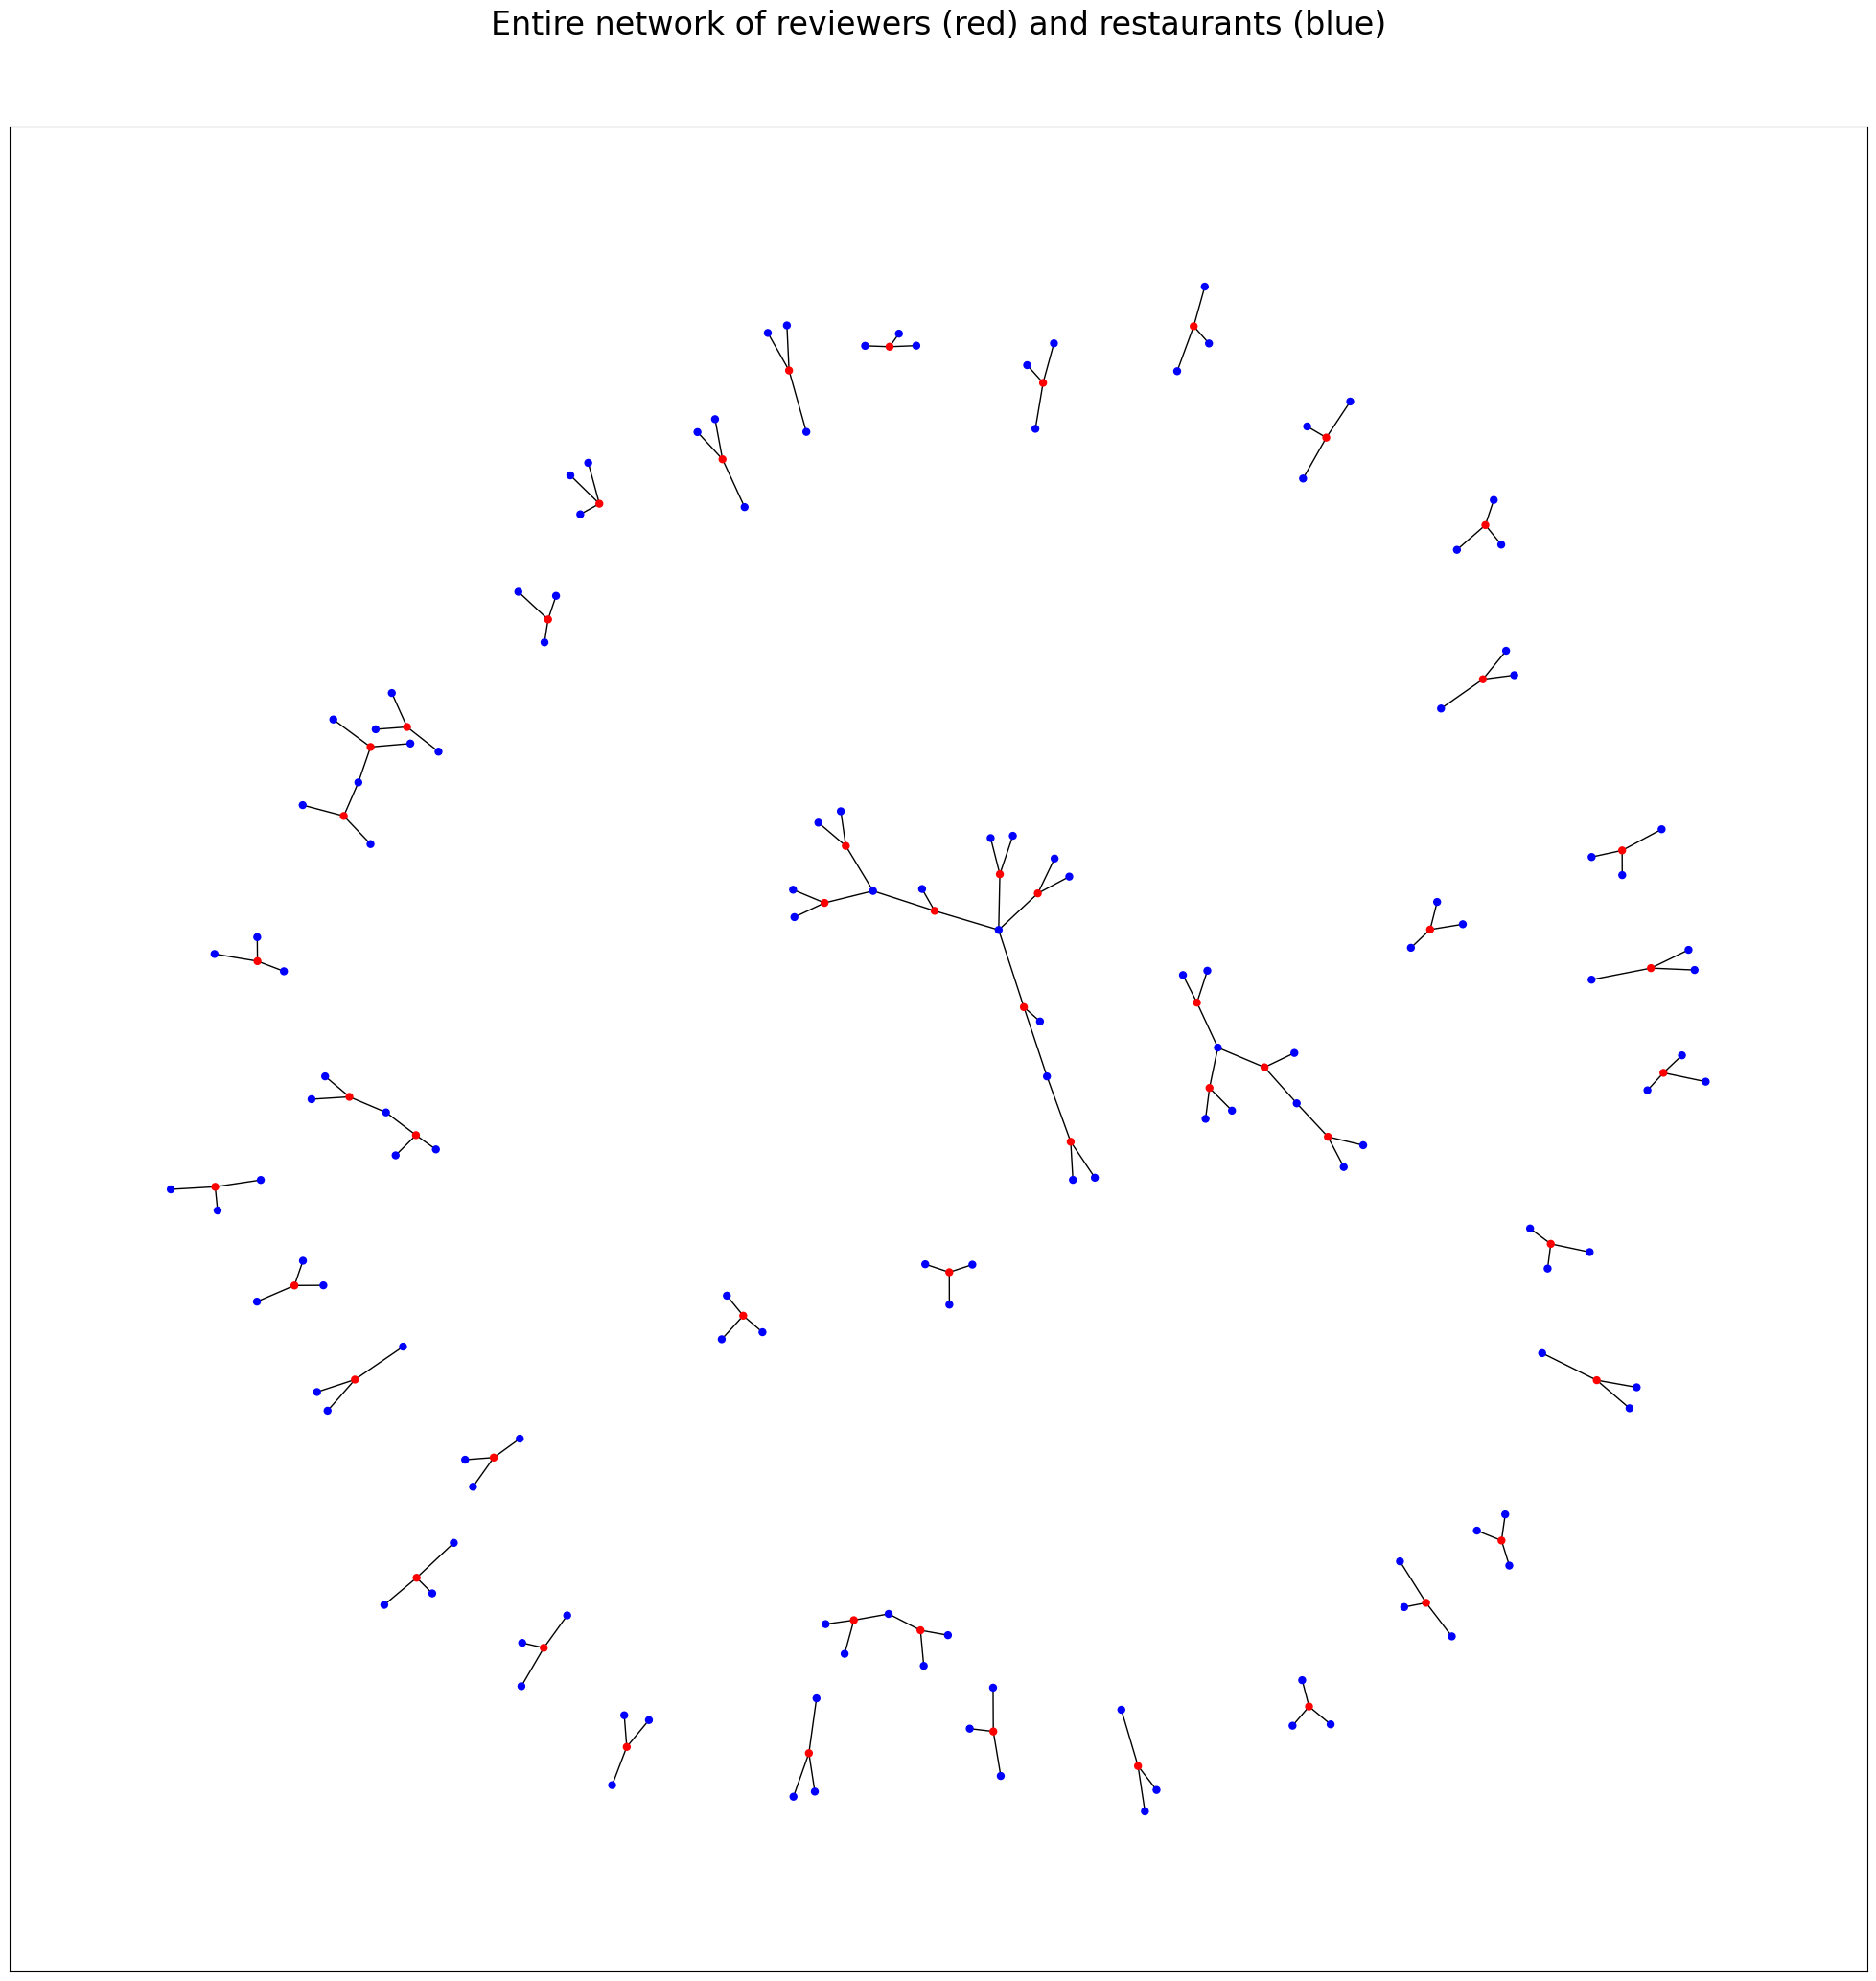

In [111]:
#Create the bipartite graph
graph = nx.Graph()


    
plt.show()
graph.add_nodes_from(restaurant_df['review_user_id']      ,bipartite=1, with_labels=False)
graph.add_nodes_from(restaurant_df['business_id'],bipartite=0, with_labels=False)
#tesing data- for each node there is at least one edge
print(nx.is_connected(graph))

#Returns True if graph G is bipartite, False if not.
print(nx.is_bipartite(graph)) 
node_colors = ['blue' if node_type == 1 else 'red' for node_type in nx.get_node_attributes(graph, 'bipartite').values()]

for i in range(len(restaurant_df)):
  graph.add_edges_from([(restaurant_df.iloc[i,1],restaurant_df.iloc[i,0])])

plt.figure(figsize=(25,25))
plt.text(0.5, 1.05, "Entire network of reviewers (red) and restaurants (blue)", fontsize=24, ha='center', transform=plt.gca().transAxes)
nx.draw_networkx(graph, with_labels=False, node_size=25,node_color=node_colors)
plt.show()


   

In [112]:
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)


#centrality calculations

W  = bipartite.projected_graph(graph, restaurant_df['review_user_id'])
C  = nx.closeness_centrality(W) 
B  = nx.betweenness_centrality(W) 
D  = nx.degree_centrality(W)
E  = nx.eigenvector_centrality(W)
#weighted
#W_weighted = bipartite.weighted_projected_graph(graph, merged_df['Organisation'])
#C_weighted  = nx.closeness_centrality(W2) 
#B_weighted  = nx.betweenness_centrality(W2) 
#D_weighted  = nx.degree(W2)
#E_weighted  = nx.eigenvector_centrality(W2)
#degee_cent=nx.degree_centrality(df)


data = []
for w in restaurant_df['review_user_id']:
    cent_degree = W.degree(w)
    #Organisation_degree_weighted = W_weighted (w, weight='weight')
    Closeness_value = C[w]
    #Closeness_value_weighted=C_weighted[w]
    Betweeness=B[w]
    #Betweeness_weighted=B_weighted[w]
    Degree=D[w]
    #Degree_weighted=D_weighted[w]
    Eigenvector=E[w]
    #Eigenvector_weighted=E_weighted[w]
    
    data.append((w 
                 ,cent_degree#,Organisation_degree_weighted
                 ,Closeness_value#, Closeness_value_weighted      
                 ,Betweeness#, Betweeness_weighted
                 ,Degree#,Degree_weighted
                 ,Eigenvector#,Eigenvector_weighted
                ))

df1 = pd.DataFrame(data, columns=["Review_user_id"
                                 ,"Degree"#,"Degree_Weighted"
                                 ,"Closeness"#,"Closeness Centrality Weighted"
                                 ,"Betweeness"#,"Betweenness Centrality Weighted"
                                 ,"Degree_Cent"#,"Degree Centrality Weighted"
                                 ,"Eigenvector"#,"Eigenvector_weighted"
                                ]
                                )

df1 = df1.drop_duplicates()
sorted_df1 = df1.sort_values(by='Degree', ascending=False)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
sorted_df1

,Review_user_id,Degree,Closeness,Betweeness,Degree_Cent,Eigenvector
14,bd0okEGblYceUqC9f9uTcg,8,0.071533,0.007299,0.058394,5.694100e-01
20,jQveoxxClSrkeyDnpHEX9g,6,0.046715,0.002147,0.043796,2.197908e-04
79,HGUyWBhs0Jnmif7NZWKYrg,6,0.059611,0.004723,0.043796,4.016128e-01
76,P7NHWUJlApHDaBlT-vFceg,4,0.051095,0.002576,0.029197,2.823385e-01
70,plIqYQLJ1sGr6K0djbd1dg,4,0.029197,0.000429,0.029197,6.633092e-09
67,QuWYxm3ij1Qsa9mUH371Xw,4,0.038929,0.001288,0.029197,1.550696e-04
21,-yEhhXT6URxh_yxHko5Gzg,4,0.029197,0.000429,0.029197,6.633092e-09
2,2M2GdA9HzcXI5cqECZDqgg,4,0.029197,0.000429,0.029197,6.633092e-09
106,CIhr-8qDcj_ZoBhc-5IZJQ,2,0.014599,0.000000,0.014599,3.548078e-14
107,0p3jLbqJB3I_0tieaNBvUQ,2,0.014599,0.000000,0.014599,3.548078e-14


In [113]:

#sorted_df1 = sorted_df1.merge(restaurant_df[['review_user_id', 'review_user']], left_on='Review_user_id', right_on='review_user_id', how='left')
#df = sorted_df1.drop(columns='review_user_id')
df = sorted_df1

In [114]:
df = df.drop_duplicates()
df

,Review_user_id,Degree,Closeness,Betweeness,Degree_Cent,Eigenvector
14,bd0okEGblYceUqC9f9uTcg,8,0.071533,0.007299,0.058394,5.694100e-01
20,jQveoxxClSrkeyDnpHEX9g,6,0.046715,0.002147,0.043796,2.197908e-04
79,HGUyWBhs0Jnmif7NZWKYrg,6,0.059611,0.004723,0.043796,4.016128e-01
76,P7NHWUJlApHDaBlT-vFceg,4,0.051095,0.002576,0.029197,2.823385e-01
70,plIqYQLJ1sGr6K0djbd1dg,4,0.029197,0.000429,0.029197,6.633092e-09
67,QuWYxm3ij1Qsa9mUH371Xw,4,0.038929,0.001288,0.029197,1.550696e-04
21,-yEhhXT6URxh_yxHko5Gzg,4,0.029197,0.000429,0.029197,6.633092e-09
2,2M2GdA9HzcXI5cqECZDqgg,4,0.029197,0.000429,0.029197,6.633092e-09
106,CIhr-8qDcj_ZoBhc-5IZJQ,2,0.014599,0.000000,0.014599,3.548078e-14
107,0p3jLbqJB3I_0tieaNBvUQ,2,0.014599,0.000000,0.014599,3.548078e-14


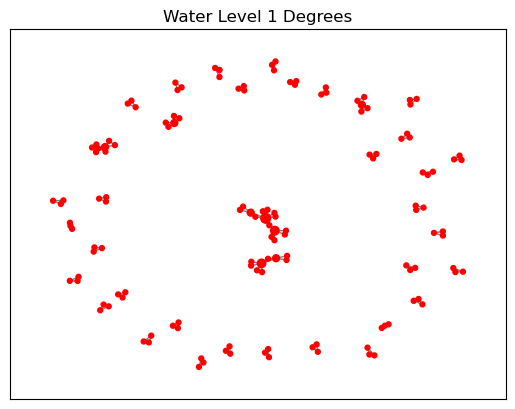

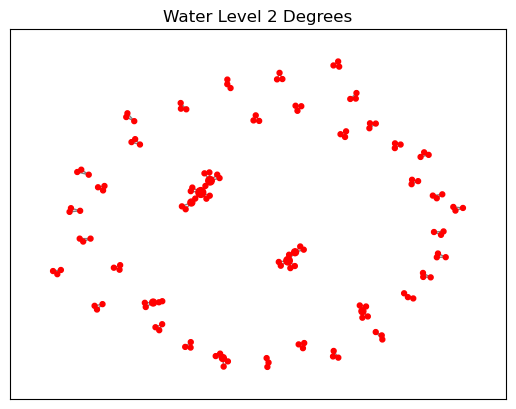

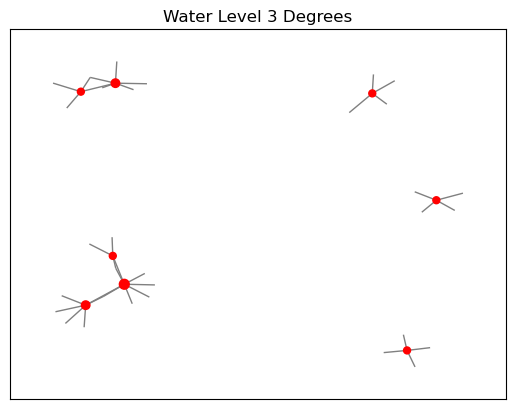

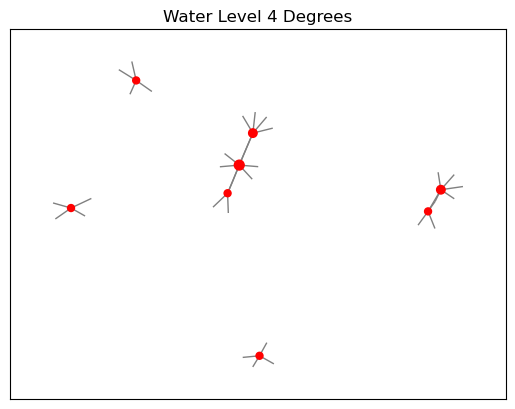

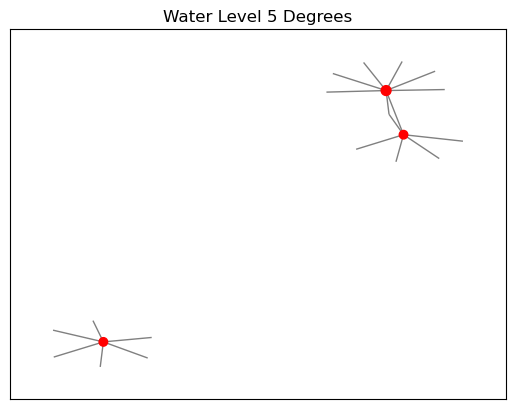

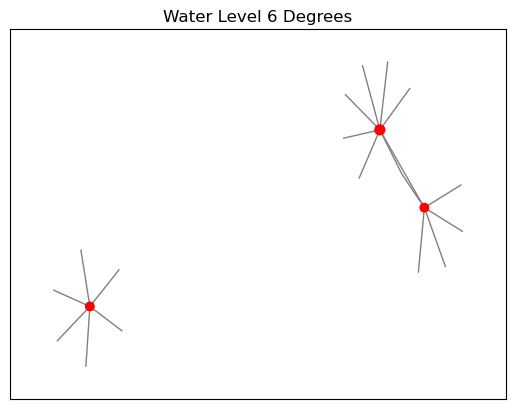

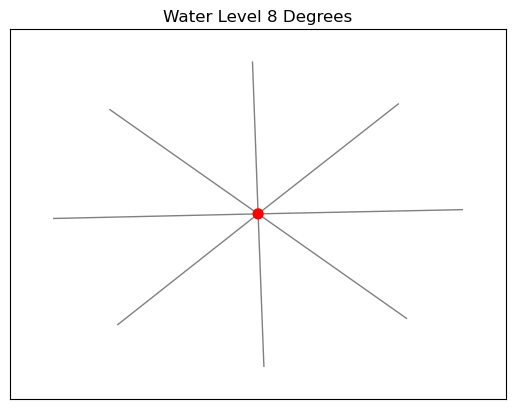

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite

def plot_water_level(graph, df, water_level):
    greater_than = df.loc[df['Degree'] >= water_level]
    W = bipartite.projected_graph(graph, greater_than['Review_user_id'])
    
    islands = []
    visited = set()
    for node in greater_than['Review_user_id']:
        if node not in visited:
            island = nx.node_connected_component(W, node)
            islands.append(island)
            visited.update(island)
    
    level_graph = nx.Graph()
    for island in islands:
        level_graph.add_edges_from(W.subgraph(island).edges())
    
    pos = nx.spring_layout(level_graph)
    
    degree_centrality_values = greater_than.set_index('Review_user_id')['Degree_Cent']
    max_degree = np.max(degree_centrality_values.values)
    node_sizes = [degree_centrality_values.get(node, 0) / max_degree * 50 for node in level_graph.nodes()]
    
    plt.figure()
    nx.draw_networkx(level_graph,
                     pos,
                     with_labels=False,
                     node_color='red',
                     node_size=node_sizes,
                     edge_color='gray',
                     font_size=8)
    plt.title(f"Water Level {water_level} Degrees")
    plt.show()

# Example usage
plot_water_level(graph, sorted_df1, 1)
plot_water_level(graph, sorted_df1, 2)
plot_water_level(graph, sorted_df1, 3)
plot_water_level(graph, sorted_df1, 4)
plot_water_level(graph, sorted_df1, 5)
plot_water_level(graph, sorted_df1, 6)
plot_water_level(graph, sorted_df1, 8)
